In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import linregress

#from scipy.optimize import curve_fit
from ssi import SSI

In [4]:
#img = SSI('C0527286452R.pho.cub', align=True)#'k: 6.31e-01, B0: 5.43e-01, r^2: 0.92'
#img = SSI('C0527286379R.pho.cub', align=True)#'k: 9.68e-01, B0: 1.00e+00, r^2: 0.96'
#img = SSI('tb_cal.pho.cub', align=True) #'k: 5.49e-01, B0: 5.76e-01, r^2: 0.88'
img = SSI('C0349875126R.pho.cub', align=True) # 
#img = SSI('C0374649000R.pho.cub', align=True)#k: 1.02e+00, B0: 7.20e-01, r^2: 0.88
#img = SSI('C0374649026R.pho.cub', align=True)#k: 1.28e+00, B0: 7.29e-01, r^2: 0.90
#img = SSI('C0420619300R.pho.cub', align=True) # k: 1.08e+00, B0: 6.77e-01, r^2: 0.19
#img = SSI('C0426272825R.pho.cub', align=True)  # line thru bright region has odd fit values
#img = SSI('C0426272635R.pho.cub', align=True)   # k: -2.83e+01, B0: 1.15e-05, r^2: 0.04
#img = SSI('C0420619326R.pho.cub', align=True)# k: 9.38e-01, B0: 5.85e-01, r^2: 0.16
#img = SSI('C0440948813R.pho.cub', align=True) #odd fit values
#img = SSI('C0440948814R.pho.cub', align=True) #'k: 6.13e+00, B0: 1.62e+00, r^2: 0.07'
#img = SSI('C0449967754R.pho.cub', align=True) #k: -4.19e+01, B0: 8.93e-06, r^2: 0.04, p = 4.1
#img = SSI('C0449974326R.pho.cub', align=True) #k: 8.95e-01, B0: 6.08e-01, r^2: 0.11, phase = 101
#img = SSI('C0466664339R.pho.cub', align=True) #k: 1.16e+00, B0: 1.13e+00, r^2: 0.36', p=71
#img = SSI('C0466670739R.pho.cub', align=True) #emission varies but still cudn't be fit
#img = SSI('C0484888739R.pho.cub', align=True) #k: 2.95e+00, B0: 3.23e+01, r^2: 0.03, p=119.5
#img = SSI('C0527272726R.pho.cub', align=True) #k: 2.63e-01, B0: 9.31e-02, r^2: 0.06, phase =65
#img = SSI('C0527286314R.pho.cub', align=True) #k: 8.92e-01, B0: 8.11e-01, r^2: 0.89, phase =41
#img = SSI('C0527286366R.pho.cub', align=True) #k: 1.10e+00, B0: 9.40e-01, r^2: 0.41     REDO
#img = SSI('C0349875100R.pho.cub', align=True) #k: 5.96e-01, B0: 6.05e-01, r^2: 0.93
#C0349875100R.pho.cub
img

<SSI> Cube: C0349875126R
 - Size: (800, 800)
 - Start time: 1996-06-28 01:43:22
 - Filter name: CLEAR
 - Exposure: 0.00417 seconds
 - Main target: EUROPA
 - Data alignment: (0, 0)

In [5]:
cond = ~np.isnan(img.phase)
np.max(img.phase[cond])

37.964935302734375

In [6]:
cond = ~np.isnan(img.phase)
np.min(img.phase[cond])

37.484283447265625

In [7]:
cond = ~np.isnan(img.inc)
np.max(img.inc[cond])

54.3182258605957

In [8]:
cond = ~np.isnan(img.emi)
np.max(img.emi[cond])

80.24213409423828

In [9]:
cond = ~np.isnan(img.emi)
np.min(img.emi[cond])

0.020435767248272896

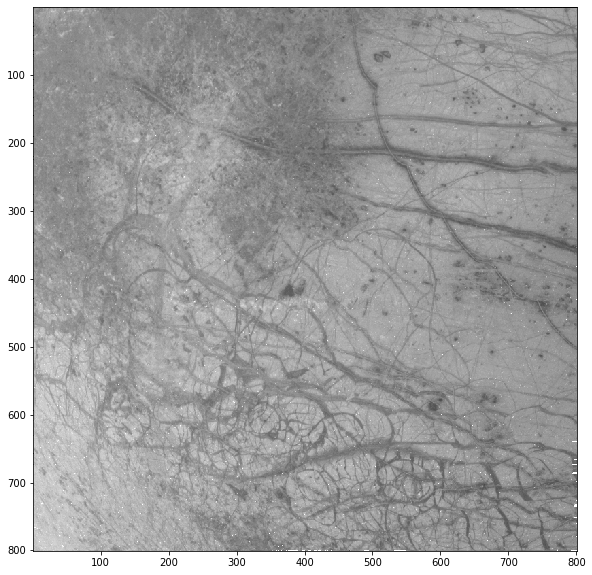

In [10]:
plt.figure(figsize=(10, 10))

plt.imshow(img.data, cmap='gray', extent=img.extent, vmin=0, vmax=1);
# plt.imshow(, cmap='Reds', extent=img.extent, alpha=.8);

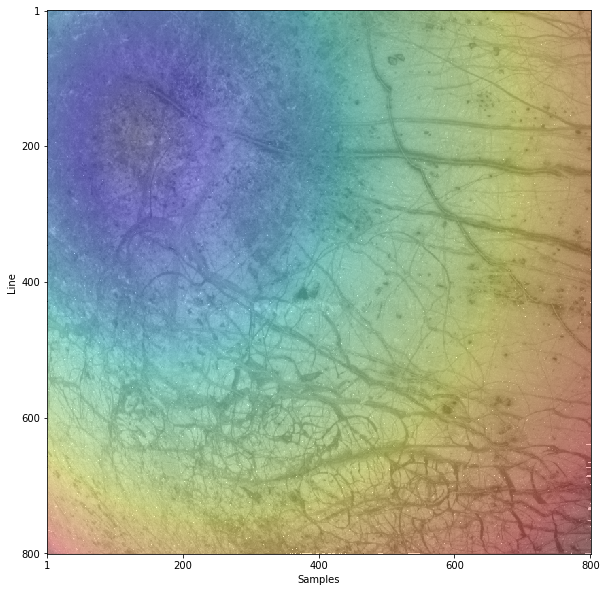

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

ax.imshow(img.data, cmap='gray', extent=img.extent, vmin=0, vmax=1)
ax.imshow(img.inc, cmap='jet', extent=img.extent, alpha=.3)
ax.set_xlabel('Samples')
ax.set_ylabel('Line')
ax.set_xticks(img.sticks)
ax.set_yticks(img.lticks);

In [12]:
def mask_bbox(data, x0, y0, x1, y1):
    """Mask data on a boundry box.
    
    Parameters
    ----------
    data: np.array
        Input data to mask
    x0: int
        Top left corner x-coordinate.
    y0: int
        Top left corner y-coordinate.
    x1: int
        Bottom right corner x-coordinate.
    y1: int
        Bottom right corner y-coordinate.
        
    Note
    ----
    Data start at (1, 1) and ends at (NL, NS).
    
    """
    mask = np.ones(np.shape(data))
    xl, xr = int(min(x0, x1) - 1), int(max(x0, x1))
    yt, yb = int(min(y0, y1) - 1), int(max(y0, y1))
    mask[yt:yb, xl:xr] = 0
    return np.ma.array(data, mask=mask)

In [13]:
(x0, y0), (x1, y1) = (400, 500), (200, 500)
sub_data = mask_bbox(img.data, x0, y0, x1, y1)
sub_emi = mask_bbox(img.emi, x0, y0, x1, y1)

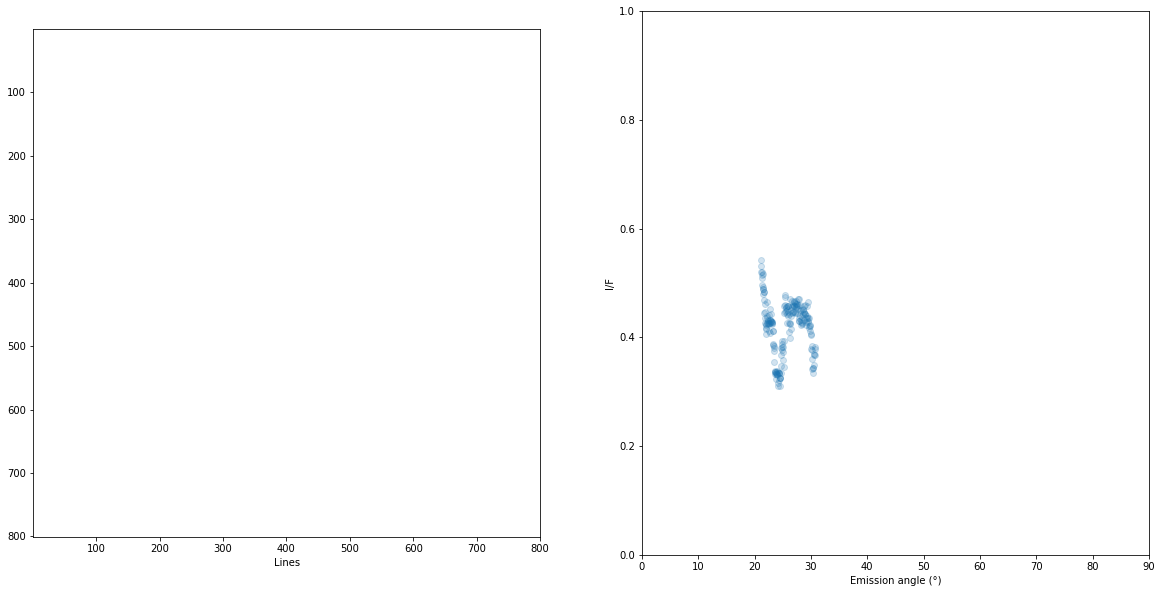

In [55]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 10))

ax0.imshow(sub_data, extent=img.extent, vmin=0, vmax=1, cmap='gray')
ax1.scatter(sub_emi, sub_data, alpha=.2)

plt.ylim(0, 1)
plt.xlim(0, 90)

ax0.set_xlabel('Samples')
ax0.set_xlabel('Lines')

ax1.set_ylabel('I/F')
ax1.set_xlabel('Emission angle (°)');

In [40]:
L = 100
i_f = img.data[:, L]
inc = img.inc[:, L]
emi = img.emi[:, L]
mu0 = img.mu0[:, L]
mu1 = img.mu1[:, L]

#L = 75
#i_f = img.data[250:, L]
#inc = img.inc[250:, L]
#emi = img.emi[250:, L]
#mu0 = img.mu0[250:, L]
#mu1 = img.mu1[250:, L]

#S = 350
#i_f = img.data[S, :]
#inc = img.inc[S, :]
#emi = img.emi[S, :]
#mu0 = img.mu0[S, :]
#mu1 = img.mu1[S, :]

#S = 50
#i_f = img.data[S, :400]
#inc = img.inc[S, :400]
#emi = img.emi[S, :400]
#mu0 = img.mu0[S, :400]
#mu1 = img.mu1[S, :400]

In [41]:
xdata = np.log(mu0 * mu1)
ydata = np.log(i_f * mu1)
cond = ~np.isnan(xdata) & ~np.isnan(ydata)

k, lnB0, r_value, p_value, std_err = linregress(xdata[cond], ydata[cond])

f'k: {k:.2e}, B0: {np.exp(lnB0):.2e}, r^2: {r_value**2:.2f}'

C:\Users\rajanidh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


'k: 5.75e-01, B0: 5.79e-01, r^2: 0.87'

In [42]:
x = np.linspace(np.nanmin(xdata), np.nanmax(xdata))
y = k * x + lnB0

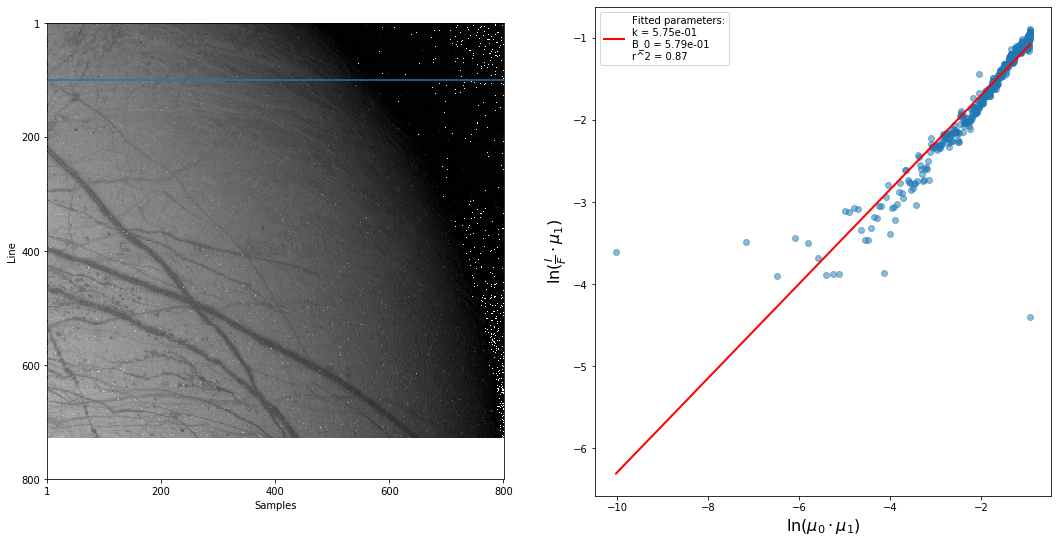

In [43]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(18, 9))

ax0.imshow(img.data, cmap='gray', extent=img.extent, vmin=0, vmax=1)
#ax0.imshow(img.inc, cmap='jet', extent=img.extent, alpha=.3)
ax0.axhline(L)
#ax0.axvline(S)

ax0.set_xlabel('Samples')
ax0.set_ylabel('Line')
ax0.set_xticks(img.sticks)
ax0.set_yticks(img.lticks)

ax1.scatter(xdata, ydata, alpha=.5)
ax1.plot(x, y, 'r-', lw=2, label=f'Fitted parameters:\nk = {k:.2e}\nB_0 = {np.exp(lnB0):.2e}\nr^2 = {r_value**2:.2f}')#'\n)
ax1.set_xlabel(r'$\ln(\mu_0 \cdot \mu_1)$', fontsize=16)
ax1.set_ylabel(r'$\ln(\frac{I}{F} \cdot \mu_1)$', fontsize=16)
ax1.legend();

In [44]:
def xydata(smin=None, smax=None, lmin=None, lmax=None):
    i_f = img.data[lmin:lmax, lmin:lmax]
    inc = img.inc[lmin:lmax, lmin:lmax]
    emi = img.emi[lmin:lmax, lmin:lmax]
    mu0 = img.mu0[lmin:lmax, lmin:lmax]
    mu1 = img.mu1[lmin:lmax, lmin:lmax]

    xdata = np.log(mu0 * mu1)
    ydata = np.log(i_f * mu1)
    
    return xdata, ydata

xydata(smin=400, lmin=400)[0].shape

C:\Users\rajanidh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  
C:\Users\rajanidh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


(401, 401)

C:\Users\rajanidh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


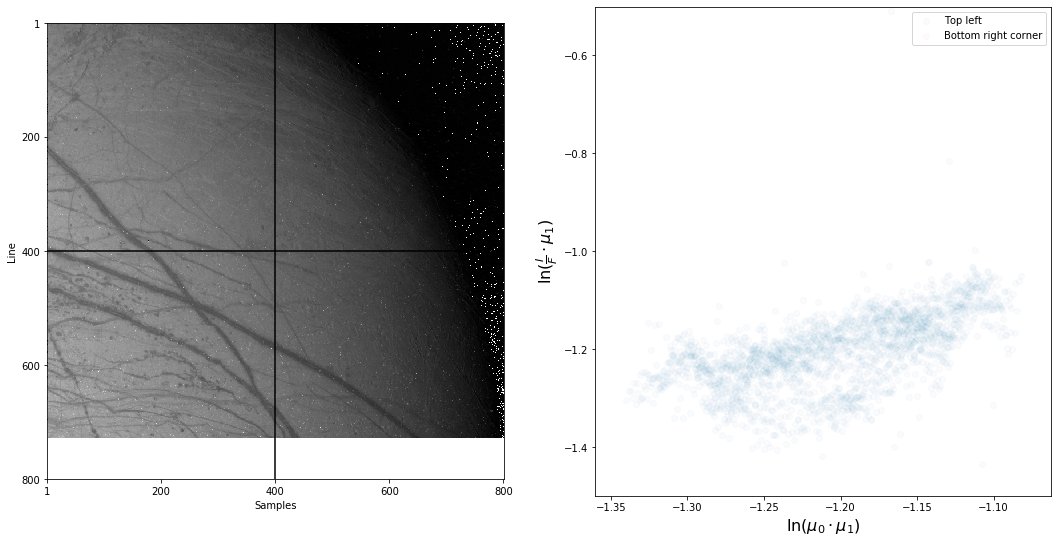

In [45]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(18, 9))

ax0.imshow(img.data, cmap='gray', extent=img.extent, vmin=0, vmax=1)
ax0.axhline(400, color='k')
ax0.axvline(400, color='k')

ax0.set_xlabel('Samples')
ax0.set_ylabel('Line')
ax0.set_xticks(img.sticks)
ax0.set_yticks(img.lticks)

ax1.scatter(*xydata(smax=50, lmax=50), alpha=.025, label='Top left')
ax1.scatter(*xydata(smin=750, lmin=750), alpha=.025, label='Bottom right corner')
ax1.set_xlabel(r'$\ln(\mu_0 \cdot \mu_1)$', fontsize=16)
ax1.set_ylabel(r'$\ln(\frac{I}{F} \cdot \mu_1)$', fontsize=16)
ax1.legend()

ax1.set_ylim(-1.5, -.5);

In [30]:
def geo_europa(lon, lat):
    # ...
    return unit

[geo_europa(pixel.lon, pixel.lat) for pixel in img.pixels]